## Trabalho de programação: Análise de Dados da Prouni
### Grupo: Azzure, Luiz, Carol e Pedro
### Análises a serem feitas:
Faça uma classificação dos dados utilizando os atributos sexo, raça,
idade e região e descreva o perfil observado dos maiores
recebedores de bolsa e plote um gráfico.

Ranqueie os 5 cursos mais financiados, assim como as 5 instituições
que mais receberam bolsas e plote um gráfico.
Classifique a modalidade de ensino de bolsa, tipo de bolsa e a média
de idade e plote em gráfico.
Classifique os indivíduos do sexo feminino, masculino, turno do curso
juntamente com a modalidade de ensino, plote um gráfico.
Plote um gráfico das 5 cidades do Espirito Santo que mais ganharam
bolsas.

### Essa caixinha de texto pode ser usada para nossos comentários galera
Vamos utilizar as bibliotecas pandas e matplotlib

Recomendo usar o VSCode. Precisa instalar a extensão do jupyter notebook.

A gente precisa instalar primeiro, então é só executar esse comando no terminal: `pip3 install -r requirements.txt`

Aqui estão os links da documentação para referêcia: https://pandas.pydata.org/docs/reference/frame.html

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
# Ler o nosso dataset 
df = pd.read_csv("prouni_2016_2019.csv")
df = df.sample(100000)

In [2]:
# Usar o método .info() do dataset para pegar algumas informações: da pra ver que tem 16 atributos e 942485 entradas não nulas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 870237 to 622959
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ANO_CONCESSAO_BOLSA             100000 non-null  int64  
 1   CODIGO_EMEC_IES_BOLSA           100000 non-null  int64  
 2   NOME_IES_BOLSA                  100000 non-null  object 
 3   TIPO_BOLSA                      100000 non-null  object 
 4   MODALIDADE_ENSINO_BOLSA         100000 non-null  object 
 5   NOME_CURSO_BOLSA                99995 non-null   object 
 6   NOME_TURNO_CURSO_BOLSA          100000 non-null  object 
 7   CPF_BENEFICIARIO_BOLSA          100000 non-null  object 
 8   SEXO_BENEFICIARIO_BOLSA         100000 non-null  object 
 9   RACA_BENEFICIARIO_BOLSA         100000 non-null  object 
 10  DT_NASCIMENTO_BENEFICIARIO      100000 non-null  object 
 11  BENEFICIARIO_DEFICIENTE_FISICO  100000 non-null  object 
 12  REGIAO_BENEFICIA

In [3]:
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,idade
870237,2019,2365,CENTRO UNIVERSITARIO CATALICA DO TOCANTINS,BOLSA INTEGRAL,PRESENCIAL,Sistemas De InformaAAo,Noturno,***31908183**,F,Branca,1994-03-17,nao,NORTE,TO,porto nacional,27.0
64680,2016,802,CENTRO UNIVERSITARIO CARIOCA,BOLSA INTEGRAL,EAD,Marketing,A Distancia,***073747**,M,Parda,1997-07-01,nao,SUDESTE,RJ,rio de janeiro,24.0
501113,2018,322,UNIVERSIDADE PAULISTA,BOLSA INTEGRAL,EAD,GestAo Comercial,A Distancia,***72824827**,M,Parda,1974-06-04,nao,SUDESTE,SP,sao paulo,47.0
937630,2019,2402,FACULDADE DE TECNOLOGIA E CIASNCIAS,BOLSA INTEGRAL,EAD,Pedagogia,A Distancia,***57319582**,F,Preta,1988-12-05,nao,NORDESTE,BA,salvador,32.0
753052,2019,349,CENTRO UNIVERSITARIO DE BELO HORIZONTE,BOLSA PARCIAL 50%,PRESENCIAL,Enfermagem,Matutino,***29959696**,M,Preta,1999-03-29,nao,SUDESTE,MG,belo horizonte,22.0


In [4]:
# Pegar a coluna idade e tirar a sua média
idade = df["idade"]
sexo = df["SEXO_BENEFICIARIO_BOLSA"]
municipio = df["MUNICIPIO_BENEFICIARIO_BOLSA"]
tipo_bolsa = df["TIPO_BOLSA"]

Text(0.5, 1.0, 'Histograma das faixas etátias de estudantes bolsistas')

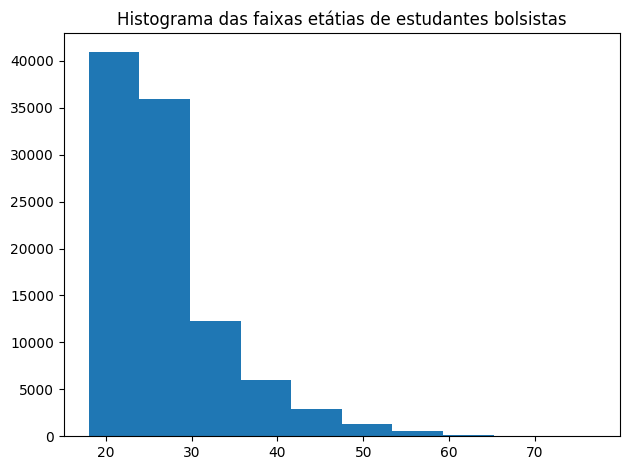

In [5]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(idade, bins=10)
axs.set_title("Histograma das faixas etátias de estudantes bolsistas")

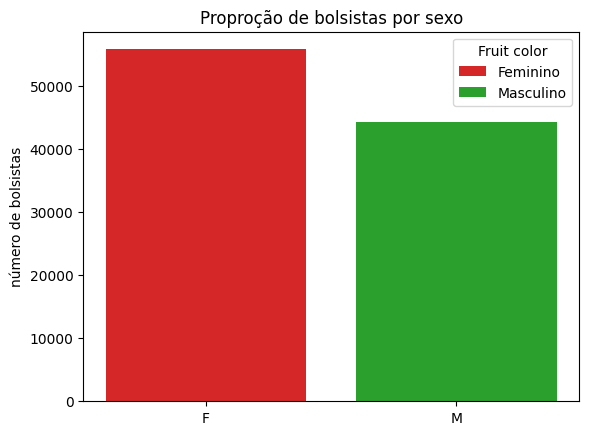

In [6]:
fig, ax = plt.subplots()

sexos = sexo.unique()
counts = [sexo.value_counts()[0],sexo.value_counts()[1]]
bar_labels = ['Feminino', 'Masculino']
bar_colors = ['tab:red', 'tab:green']

ax.bar(sexos, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('número de bolsistas')
ax.set_title('Proproção de bolsistas por sexo')
ax.legend(title='Fruit color')

plt.show()

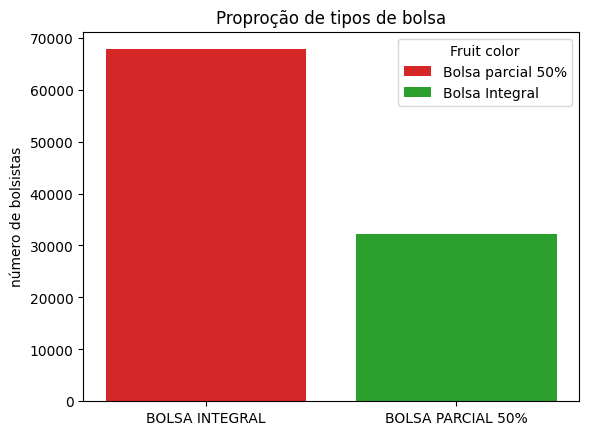

In [7]:
fig, ax = plt.subplots()

tipos = tipo_bolsa.unique()
counts = [tipo_bolsa.value_counts()[0],tipo_bolsa.value_counts()[1]]
bar_labels = ['Bolsa parcial 50%', 'Bolsa Integral']
bar_colors = ['tab:red', 'tab:green']

ax.bar(tipos, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('número de bolsistas')
ax.set_title('Proproção de tipos de bolsa')
ax.legend(title='Fruit color')

plt.show()